In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('C:/Sonu/Dissertation_Final_Project/Deliverables/Dissertation_Report/Submission_Folder/Pod_Fault_Data_CSV/PF_Memory_Cluster_Vs_Pod-Frontend.csv')
df.head(10)



Mem_Cluster  Mem_Pod_Frontend
0     47263744          41119744
1     52129792          55668736
2     52129792         219910144
3     57536512          57139200
4    124039168          56094720
5    175894528          56094720
6    176029696          56094720
7    175800320          56844288
8    102019072          56844288
9     62164992          56844288

In [2]:
# Standardization of Variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=['Mem_Cluster','Mem_Pod_Frontend'])

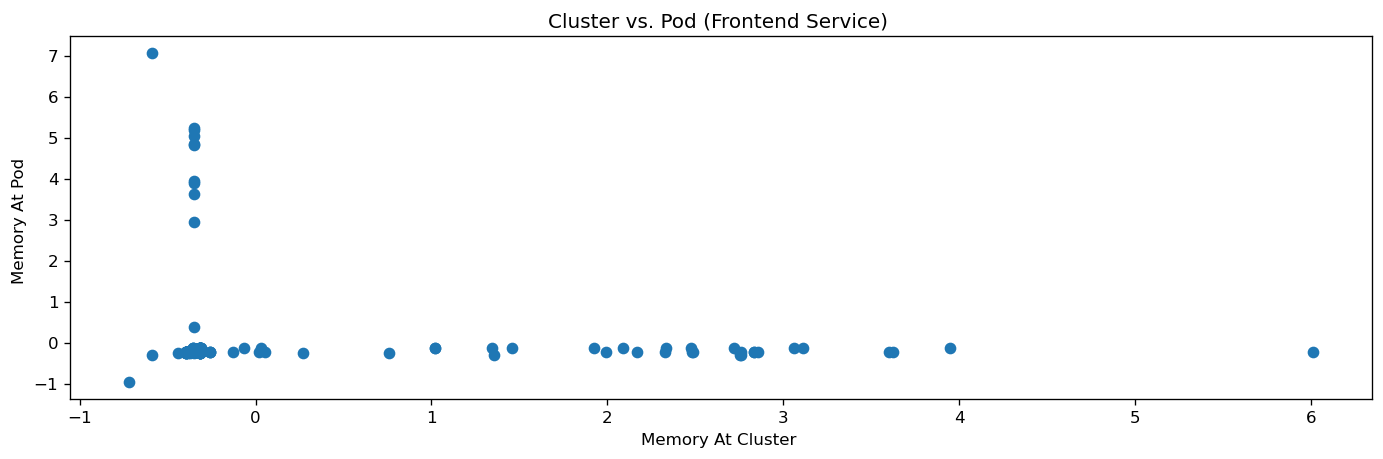

In [3]:
plt.figure(figsize=(14,4))
plt.scatter(df.Mem_Cluster, df.Mem_Pod_Frontend)
plt.xlabel('Memory At Cluster ')
plt.ylabel('Memory At Pod ')
plt.title('Cluster vs. Pod (Frontend Service) ')
plt.show()

In [4]:
# K=3 , cause of natural sub clustering and only two features in considaration.Variable fitting to the model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(df)

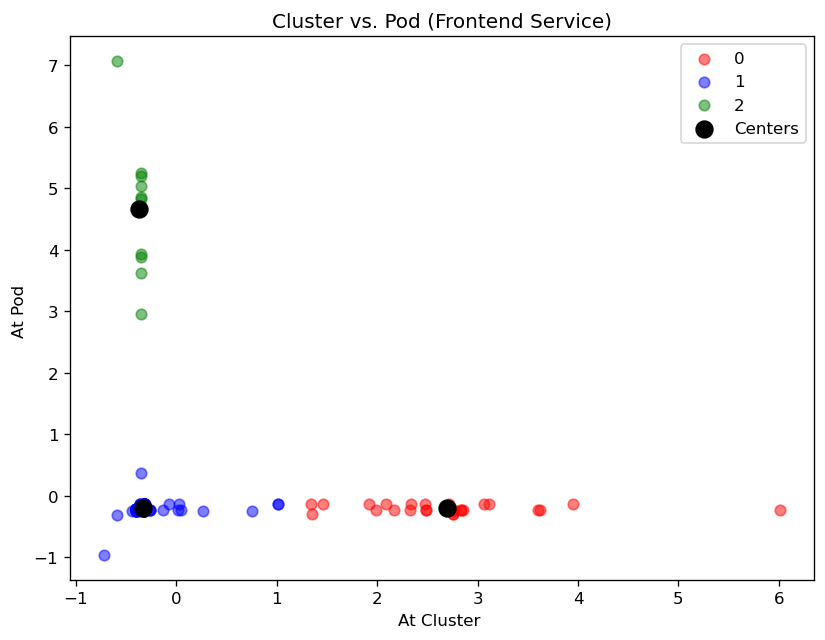

In [5]:
colors=["red","blue","green","orange"]
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].Mem_Cluster, df[model.labels_==i].Mem_Pod_Frontend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Memory Data",size=20)
plt.xlabel("At Cluster ")
plt.ylabel("At Pod ")
plt.title('Cluster vs. Pod (Frontend Service)')
plt.legend()
plt.show()

In [6]:
def distance_from_center(Mem_Cluster, Mem_Pod_Frontend, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
   :param float Cluster Memory Usage: the standardized Memory Usage of the data point 
    :param float Pod Memory Usage: the standardized Memory at Pod of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    Cluster_Mem =  model.cluster_centers_[label,0]
    Pod_Mem_Frontend =  model.cluster_centers_[label,1]
    distance = np.sqrt((Mem_Cluster - Cluster_Mem) ** 2 + (Mem_Pod_Frontend - Pod_Mem_Frontend) ** 2)
    return np.round(distance, 2)
df['label'] = model.labels_
df['distance'] = distance_from_center(df.Mem_Cluster, df.Mem_Pod_Frontend, df.label)

In [7]:
# Sorting datafram to find the top outliers
outliers_idx = list(df.sort_values('distance', ascending=False).head(10).index)
outliers = df[df.index.isin(outliers_idx)]
print(outliers)

     Mem_Cluster  Mem_Pod_Frontend  label  distance
2      -0.587592          7.073306      2      2.42
4       1.354659         -0.291532      0      1.34
8       0.759903         -0.257833      1      1.09
67      6.011592         -0.229290      0      3.32
146    -0.348517          2.950956      2      1.71
214     1.457989         -0.131691      0      1.24
231     1.345698         -0.131322      0      1.35
232     3.950301         -0.131322      0      1.26
233     1.018339         -0.131322      1      1.35
234     1.018339         -0.131322      1      1.35


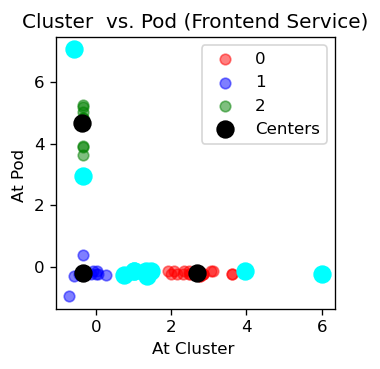

In [8]:
# figure setting
plt.figure(figsize=(3,3))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].Mem_Cluster, df[model.labels_==i].Mem_Pod_Frontend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.Mem_Cluster, outliers.Mem_Pod_Frontend, c='aqua', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Memory Data",size=20)
plt.xlabel("At Cluster ")
plt.ylabel("At Pod ")
plt.title('Cluster  vs. Pod (Frontend Service)')
plt.legend()
plt.show()